In [12]:
import pandas as pd
import os
from git import Repo
import matplotlib.pyplot as plt
import geopandas as gpd
import urllib
import shutil
%matplotlib inline

In [13]:
covidfolder = '../data_external/covid19'

In [14]:
if os.path.isdir(covidfolder): # if repo exists, pull newest data
    repo = Repo(covidfolder)
    repo.remotes.origin.pull()
else: # otherwise, clone from remote
    repo = Repo.clone_from('https://github.com/CSSEGISandData/COVID-19.git',covidfolder)

In [15]:
datadir = os.path.join(covidfolder, 'csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')

In [16]:
data = pd.read_csv(datadir)

In [17]:
# Filter the data for Oregon, Washington, and California

oregon_data = data[data['Province_State'] == 'Oregon']
washington_data = data[data['Province_State'] == 'Washington']
california_data = data[data['Province_State'] == 'California']


In [18]:
# Extract the date columns and cases for each state

oregon_cases = oregon_data.iloc[:, 11:]
washington_cases = washington_data.iloc[:, 11:]
california_cases = california_data.iloc[:, 11:]

In [19]:
dates = pd.to_datetime(oregon_cases.columns)

C:\Users\Rajarshi\AppData\Local\Temp\ipykernel_23776\3349730489.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(oregon_cases.columns)


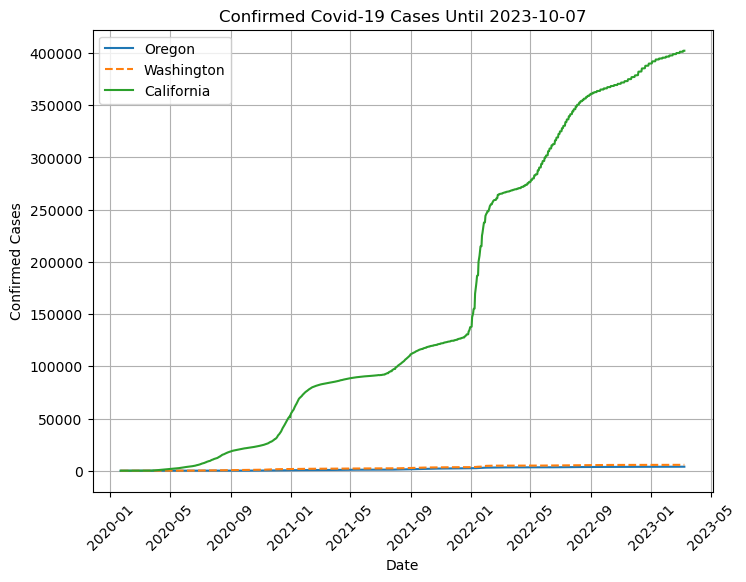

In [20]:
plt.figure(figsize=(8, 6))

plt.plot(dates, oregon_cases.iloc[0], label='Oregon')
plt.plot(dates, washington_cases.iloc[0], label='Washington',linestyle='dashed')
plt.plot(dates, california_cases.iloc[0], label='California')

plt.title('Confirmed Covid-19 Cases Until 2023-10-07')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')

plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()